<a href="https://colab.research.google.com/github/Drasti23/COMP3132/blob/main/Assignment4_101419828.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Name: Drasti Parikh
# Student ID: 101419828

In [1]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"drastiparikh","key":"025af9fd671bb1ce26339c9a1a17d624"}'}

In [7]:
!mv 'kaggle (1).json' kaggle.json


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
!kaggle datasets download moltean/fruits --unzip -p /content/fruits360


Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0


In [7]:
train_dir = '/content/fruits360/fruits-360_100x100/fruits-360/Training'
test_dir = '/content/fruits360/fruits-360_100x100/fruits-360/Test'


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation (for later use)
datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,  # Creating validation split (15% from Training set)
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
)

# Without augmentation (baseline)
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15
)

# Train dataset (baseline, no augmentation)
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation dataset
validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Test dataset
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 78381 images belonging to 179 classes.
Found 13719 images belonging to 179 classes.
Found 30699 images belonging to 178 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(179, activation='softmax')  # 179 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 179)            │        46,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,416,307 (13.03 MB)

 Trainable params: 3,416,307 (13.03 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=50
)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 750ms/step - accuracy: 0.0502 - loss: 4.7817 - val_accuracy: 0.4056 - val_loss: 2.4054
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 715ms/step - accuracy: 0.5201 - loss: 1.8879 - val_accuracy: 0.7606 - val_loss: 0.9198
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 710ms/step - accuracy: 0.7874 - loss: 0.7258 - val_accuracy: 0.8081 - val_loss: 0.7182
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 705ms/step - accuracy: 0.8892 - loss: 0.4011 - val_accuracy: 0.7969 - val_loss: 0.6143
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 815ms/step - accuracy: 0.9130 - loss: 0.2930 - val_accuracy: 0.8369 - val_loss: 0.6635


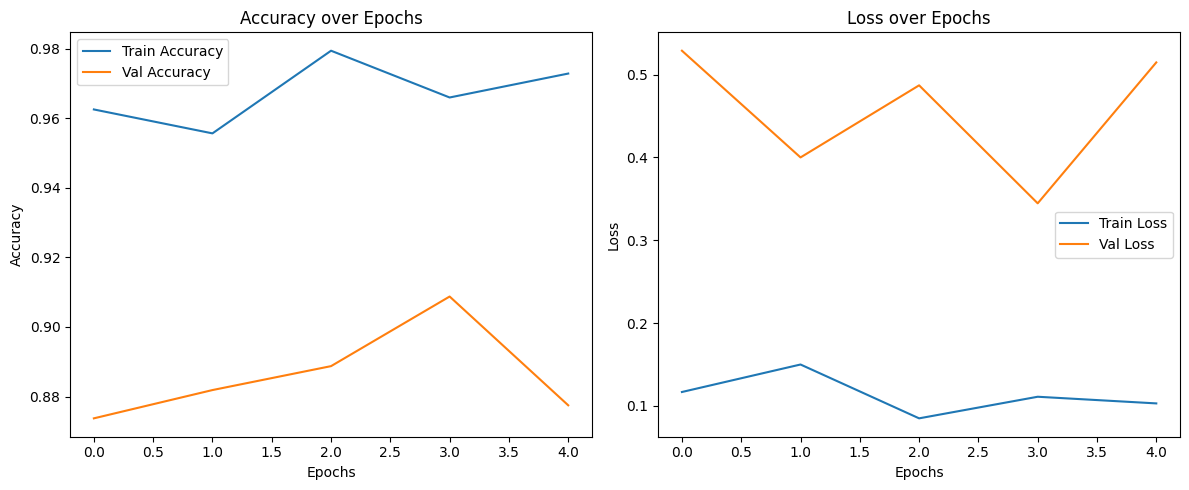

In [22]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
from tensorflow.keras import layers, models

model_dropout = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # ← Regularization
    layers.Dense(179, activation='softmax')
])

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_dropout.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 179)            │        46,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,416,307 (13.03 MB)

 Trainable params: 3,416,307 (13.03 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_dropout = model_dropout.fit(
    train_data,
    validation_data=validation_data,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=50
)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 735ms/step - accuracy: 0.0126 - loss: 5.1132 - val_accuracy: 0.1044 - val_loss: 4.2022
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 716ms/step - accuracy: 0.0931 - loss: 4.1583 - val_accuracy: 0.3975 - val_loss: 2.5994
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 823ms/step - accuracy: 0.2890 - loss: 2.8432 - val_accuracy: 0.6206 - val_loss: 1.4828
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 825ms/step - accuracy: 0.4427 - loss: 2.0350 - val_accuracy: 0.7969 - val_loss: 0.9346
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 705ms/step - accuracy: 0.5607 - loss: 1.5270 - val_accuracy: 0.8462 - val_loss: 0.6478


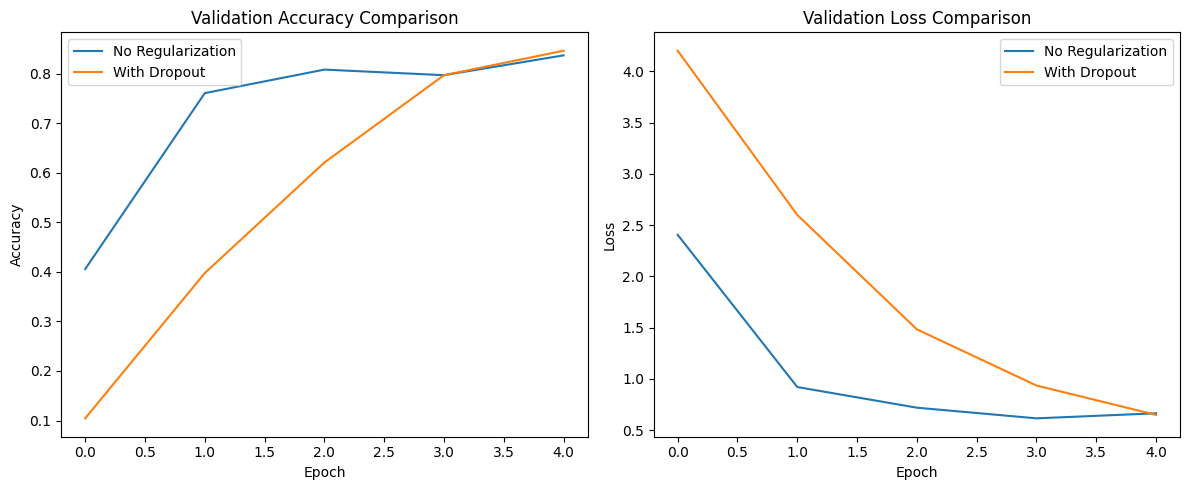

In [19]:
import matplotlib.pyplot as plt

# Accuracy comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='No Regularization')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='No Regularization')
plt.plot(history_dropout.history['val_loss'], label='With Dropout')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = augmented_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data_augmented = augmented_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 78381 images belonging to 179 classes.
Found 13719 images belonging to 179 classes.


In [31]:
history_augmented = model_dropout.fit(
    train_data_augmented,
    validation_data=val_data_augmented,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=50
)


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 864ms/step - accuracy: 0.1974 - loss: 3.5622 - val_accuracy: 0.4444 - val_loss: 2.1745
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.3021 - loss: 2.5442 - val_accuracy: 0.5031 - val_loss: 1.7953
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3632 - loss: 2.2373 - val_accuracy: 0.5525 - val_loss: 1.5216
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 870ms/step - accuracy: 0.3906 - loss: 2.0320 - val_accuracy: 0.5850 - val_loss: 1.4058
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.4732 - loss: 1.7561 - val_accuracy: 0.6762 - val_loss: 1.0835


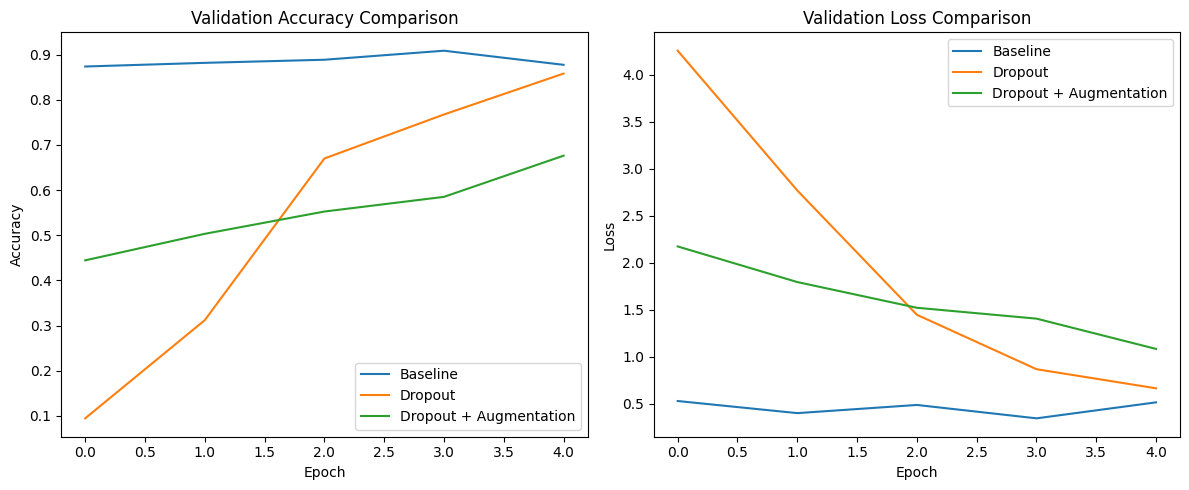

In [33]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Baseline')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.plot(history_augmented.history['val_accuracy'], label='Dropout + Augmentation')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Baseline')
plt.plot(history_dropout.history['val_loss'], label='Dropout')
plt.plot(history_augmented.history['val_loss'], label='Dropout + Augmentation')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
# Overparameterization Demo
from tensorflow.keras import layers, models

model_overfit = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(179, activation='softmax')
])

model_overfit.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_overfit.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 44, 44, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 247808)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   253,756,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 179)            │        46,003 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,009,523 (976.60 MB)

 Trainable params: 256,009,523 (976.60 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_overfit = model_overfit.fit(
    train_data,
    validation_data=validation_data,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=50
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2224s 22s/step - accuracy: 0.0144 - loss: 5.1876 - val_accuracy: 0.0213 - val_loss: 4.7310
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2209s 22s/step - accuracy: 0.0489 - loss: 4.3594 - val_accuracy: 0.1381 - val_loss: 3.5371
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2174s 22s/step - accuracy: 0.1707 - loss: 3.2794 - val_accuracy: 0.3019 - val_loss: 2.5646
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2243s 22s/step - accuracy: 0.3754 - loss: 2.1141 - val_accuracy: 0.4925 - val_loss: 1.7174
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2199s 22s/step - accuracy: 0.5536 - loss: 1.4761 - val_accuracy: 0.6556 - val_loss: 1.1845


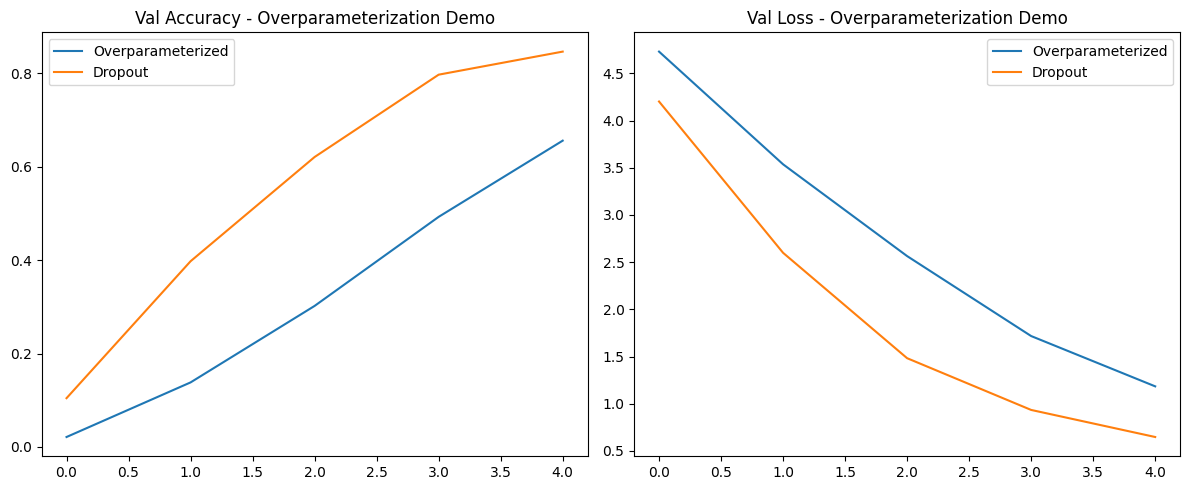

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_overfit.history['val_accuracy'], label='Overparameterized')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.title('Val Accuracy - Overparameterization Demo')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_overfit.history['val_loss'], label='Overparameterized')
plt.plot(history_dropout.history['val_loss'], label='Dropout')
plt.title('Val Loss - Overparameterization Demo')
plt.legend()

plt.tight_layout()
plt.show()
